Step1:Import Libraries

In [1]:
# Explanation:
# pandas/Numpy: data handling.
# Seaborn/matplotlib: visualization.
# scikit-learn:splitting, preprocessing, models, metrics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Step 2: Load the Diamonds Dataset


In [3]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Step 3: Quick Data Understanding

In [4]:
# Check basic info:
print(df.shape)
print(df.dtypes)
df.describe(include='all').T

# Purpose:
#  Check for missing values.
#  Understand price range & skewness.

(53940, 11)
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,NaN,NaN,NaN,26970.5,15571.281097,1.0,13485.75,26970.5,40455.25,53940.0
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9


 Step 4: Exploratory Data Analysis

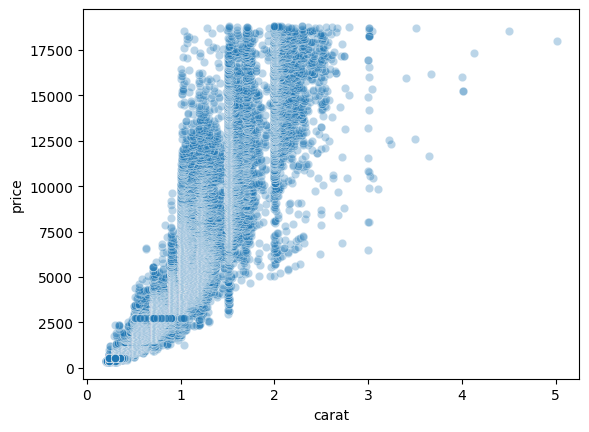

In [5]:
sns.scatterplot(data=df, x='carat', y='price', alpha=0.3)
plt.show('Carat vs Price')
plt.show()

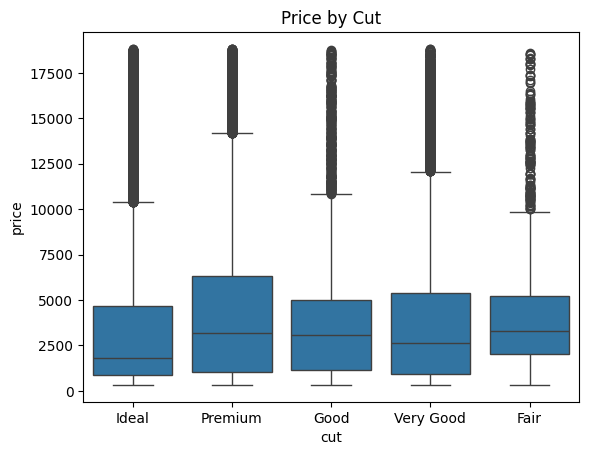

In [6]:
sns.boxplot(data=df, x='cut', y='price')
plt.title('Price by Cut')
plt.show()

EDA: Correlation & Feature Insight

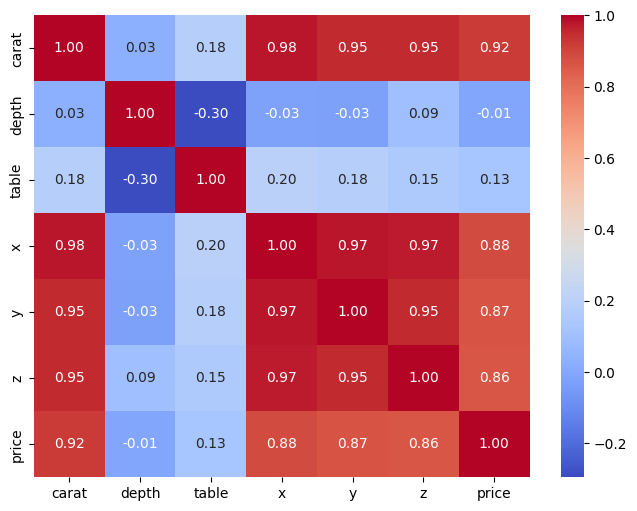

In [7]:
#Numeric correlation heatmap:
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

 Step 5: Data Cleaning

In [8]:
# Typical checks & fixes:
# Remove obvious invalid rows (if any)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]


In [9]:
# confirm no missing values
print(df.isna().sum())


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [10]:
# Confirm no missing values
print(df.isna().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [11]:
# Explanation: Diamonds with 0 dimensions are likely data errors. In this dataset, missing values are usually minimal or none.

Step 6: Defining Features & Target


In [12]:
# In this step separating the input features(X) and Target variables(Y) for splitting the data.
# Features (X)-These are the input variables
# The model uses them to learn patterns

# Target (y)-This is the output variable
#The value you want the model to predict

In [13]:
X = df.drop(columns=['price'])  # Target is  price
y = df['price']

# Thie code removes the price column else evryhting becomes input feature
# X contains all input features by removing the target column(price) from the dataset.
# y contains only the target variable, which represents the value the model needs to predict.
# This separation prevents data leakage and ensures the model learns patterns only from input features while predicting the target output.

In [14]:
# Identify column types:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [15]:
# In the above step why we chosed column types , bcz -scikit-learn processing often depends on feature type.numeric features require scaling, while categorical features must be encoded.”

Step 7: Train/Test Split

In [16]:
# Create a hold-out test set for final evaluation

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape)

(43136, 10) (10784, 10)


In [18]:
# the output shows that the dataset was spilt into training and testing set. training set contains 43,136 samples and the test set contains 10,784 samples, both with 10 feature column.

explanation
train_test_split(X, y, ...)

Splits the feature data (X) and target data (y) into training and testing sets.

test_size=0.2

Reserves 20% of the data as the test (hold-out) set.

The remaining 80% is used for training the model.

random_state=42

Fixes the random seed so the split is reproducible.

Running the code again will give the same split.

In [19]:
# X_train → features used to train the model
# X_test → features used for final evaluation
# y_train → target values for training
# y_test → target values for testing

Step 8: Preprocessing Pipeline

In [20]:
# Define preprocessing for numeric + categorical features:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
]
) 


explanation
StandardScaler used for numeric features so that all numbers are on a similar scale and no large-value feature dominates the model.

OneHotEncoder is used for categorical features to convert text values into numbers that the model can understand.

handle_unknown='ignore' ensures the model does not fail if new or unseen categories appear in test or future data.

ColumnTransformer applies the right preprocessing to the right type of feature and combines everything into a single clean dataset.

This approach makes the preprocessing organized, safe, and reproducible, especially when used inside a machine-learning pipeline.

------------------------------------------

Step 9: Baseline Linear Regression

In [21]:
linreg_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),        # scales numeric and categorical featues
        ('model', LinearRegression())])         # Trains Linear Regression model

linreg_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

Explanation:
Pipeline combines preprocessing and model training.

Preprocessing runs automatically before training.

Prevents data leakage.

Ensures consistent transformations.

Makes the workflow clean and reusable.

------------------------------------------------------------------------------

Step 10: Evaluate Baseline (Linear Regression)

This step evaluates how well the trained Linear Regression model performs on the test set.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Predicting and computing metrics
y_pred_lr = linreg_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr,)           # RMSE measures the average prediction error in price units
r2_lr = r2_score(y_test, y_pred_lr)                        # R² score shows how well the model explains the variation in price.

print('Linear Regression RMSE:', rmse_lr)
print('Linear Regression R^2:', r2_lr)

Linear Regression RMSE: 1290368.126547726
Linear Regression R^2: 0.9195127194882518


Explanation:The Linear Regression model achieved an R² of 0.92, meaning it explains about 92% of the variance in diamond prices. The RMSE indicates an average prediction error of around 1.29 million,

Step 10b: Visualizing Predictions

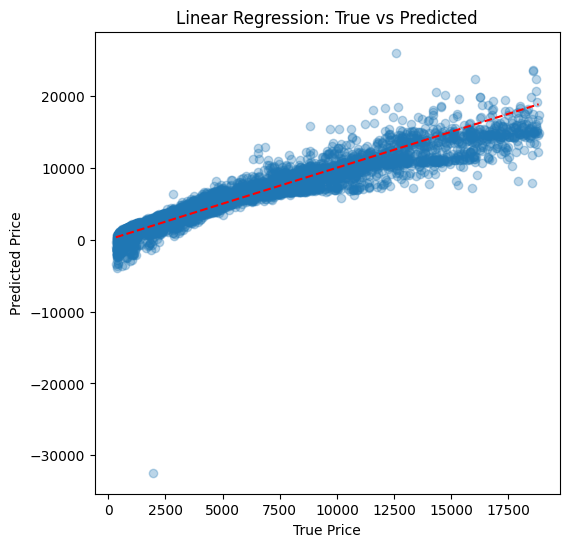

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: True vs Predicted')
plt.show()

Step 11: Random Forest Model

In [25]:
rf_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

rf_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

Explanation: This step trains Random Forest Regression model using the same preprocessing pipeline to improve prediction accuracy by capturing non-linear relationships.

Step 12: Evaluate Random Forest

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Compute RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf)

# Compute R2
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R^2:", r2_rf)


Random Forest RMSE: 272234.10299937153
Random Forest R^2: 0.9830192778617396


 Step 13: Hyperparameter Tuning (Random Search)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions={'model__n_estimators':[100,200,300],
'model__min_samples_split':[2,5,10]}
rf_base=Pipeline(
 steps=[('preprocessor', preprocessor),
 ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])
search=RandomizedSearchCV(
rf_base,
param_distributions=param_distributions,
n_iter=10,
scoring='neg_root_mean_squared_error',
cv=3,
random_state=42,
n_jobs=-1,
)
search.fit(X_train, y_train)
print('Best params:', search.best_params_)
print('Best CV RMSE:', -search.best_score_)


c:\Users\yashu\OneDrive\MLOPs\DIAMOND DATASET\.venv\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'model__n_estimators': 300, 'model__min_samples_split': 5}
Best CV RMSE: 569.246047455575


Explanation:
This step is used to improve the Random Forest model performance.

Instead of using default settings, the model tries different parameter combinations.

RandomizedSearchCV is chosen because it is faster and more efficient than trying every possible combination.

A range of values is defined for important Random Forest parameters:

Number of trees

Maximum tree depth

Minimum samples required to split a node

The model is wrapped inside a Pipeline so preprocessing and training happen together.

For each random parameter combination:

The data is split into 3 folds (cross-validation).

The model is trained and evaluated on each fold.

The performance is measured using RMSE, and the model with the lowest RMSE is selected.

Cross-validation ensures the model generalizes well and does not overfit.

The best-performing parameter set is stored as the final tuned model.

This step results in a more accurate and reliable model.

-------------------------------------------


Step 14: Best Model Evaluation

In [28]:
# Extract and evaluate the tuned model on the test set.
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print('Tuned RF RMSE:', rmse_best)
print('Tuned RF R^2:', r2_best)

Tuned RF RMSE: 271362.0552607463
Tuned RF R^2: 0.9830736722237161


Step 15: Saving the Model & Next Steps

In [29]:
import joblib
joblib.dump(best_model, 'best_rf_model.joblib')

['best_rf_model.joblib']

In [30]:
loaded_model = joblib.load('best_rf_model.joblib')
y_pred_test = loaded_model.predict(X_test[:5])
print(y_pred_test)

[  997.24882281  8186.56983538 11084.73102754  1042.6225849
   880.6592616 ]


Using  the model for single prediction To validate that the saved pipeline works end-to-end and can handle real-world input, ensuring preprocessing and prediction function correctly after serialization.

In [31]:
import pandas as pd
new_diamond = pd.DataFrame([{

    'carat': 1.0,
    'depth': 61.8,
    'table': 56,
    'x': 6.4,
    'y': 6.3,
    'z': 3.9,
    'cut': 'Ideal',
    'color': 'G',
    'clarity': 'VS1'
}])
predicted_price = loaded_model.predict(new_diamond)
print("predicted price:", predicted_price[0])

predicted price: 6284.370574074074


In [32]:
# creating a new csv file for real world use 
import pandas as pd
sample_data = pd.DataFrame({
    'carat': [1.0, 0.7],
    'depth': [61.8, 62.2],
    'table': [56, 58],
    'x': [6.4, 5.6],
    'y': [6.3, 5.5],
    'z': [3.9, 3.5],
    'cut': ['Ideal', 'Premium'],
    'color': ['G', 'E'],
    'clarity': ['VS1', 'VS2']
})
sample_data.to_csv("new_diamomd.csv", index=False)

In [33]:
# Batch prediction using CSV 
df_new = pd.read_csv("C:/Users/yashu/OneDrive/MLOPs/DIAMOND DATASET/new_diamomd.csv")
df_new['predicted_price'] = loaded_model.predict(df_new)
df_new.to_csv("diamond_price_predictions.csv", index=False)


Batch prediction using CSV is included because most real-world ML applications operate on bulk data rather than single inputs. It allows automated, scalable predictions using the saved model

In [34]:
# Monitor model drift in production

In [35]:
df_new[['carat', 'depth', 'table']].describe()
X_train[['carat', 'depth', 'table']].describe()


,carat,depth,table
count,43136.000000,43136.000000,43136.000000
mean,0.797305,61.746905,57.458626
std,0.474168,1.428401,2.227067
min,0.200000,43.000000,43.000000
25%,0.400000,61.000000,56.000000
50%,0.700000,61.800000,57.000000
75%,1.040000,62.500000,59.000000
max,5.010000,79.000000,95.000000


Model drift monitoring checks whether incoming data distributions differ from training data. By comparing summary statistics, we can detect when the model may need retraining

-----------------------------------------

# Next step: Add feature interactions or target transforms

In [36]:
# Add feature interaction
df['volume'] = df['x'] * df['y'] * df['z']

In [37]:
# Target transformation

y_log = np.log1p(df['price'])

# Next step:Deploy as a REST service or batch prediction pipeline

Consider model explainability (SHAP)